# Multi Linear Regression Assignment
# Dataset - ToyotaCorolla

# Consider only the below columns and prepare a prediction model for predicting Price.

# Corolla< Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [2]:
toyota = pd.read_csv('E:\\Study\\ASSIGNMENTS\\Multi linear regression\\ToyotaCorolla.csv', engine = 'python')

In [3]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
toyota1 = toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [5]:
toyota1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Rename the columns

In [6]:
toyota2 = toyota1.rename({'Age_08_04':'Age','Quarterly_Tax':'QTax'},axis=1)

In [7]:
toyota2.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Null value and data type check

In [8]:
toyota2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QTax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
toyota2.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QTax      0
Weight    0
dtype: int64

#### There is no null value present inside the data & the data types of attributes are appropriate

### Duplicate value check and drop

In [10]:
toyota2[toyota2.duplicated(keep= False)]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
toyota3 = toyota2.drop_duplicates()

In [12]:
toyota3.shape

(1435, 9)

## Correlation Matrix

In [13]:
toyota3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


#### From the above correlation matrix we found that the independent variables have not much colinearity in side the data

# Scatterplot between variables along with histograms

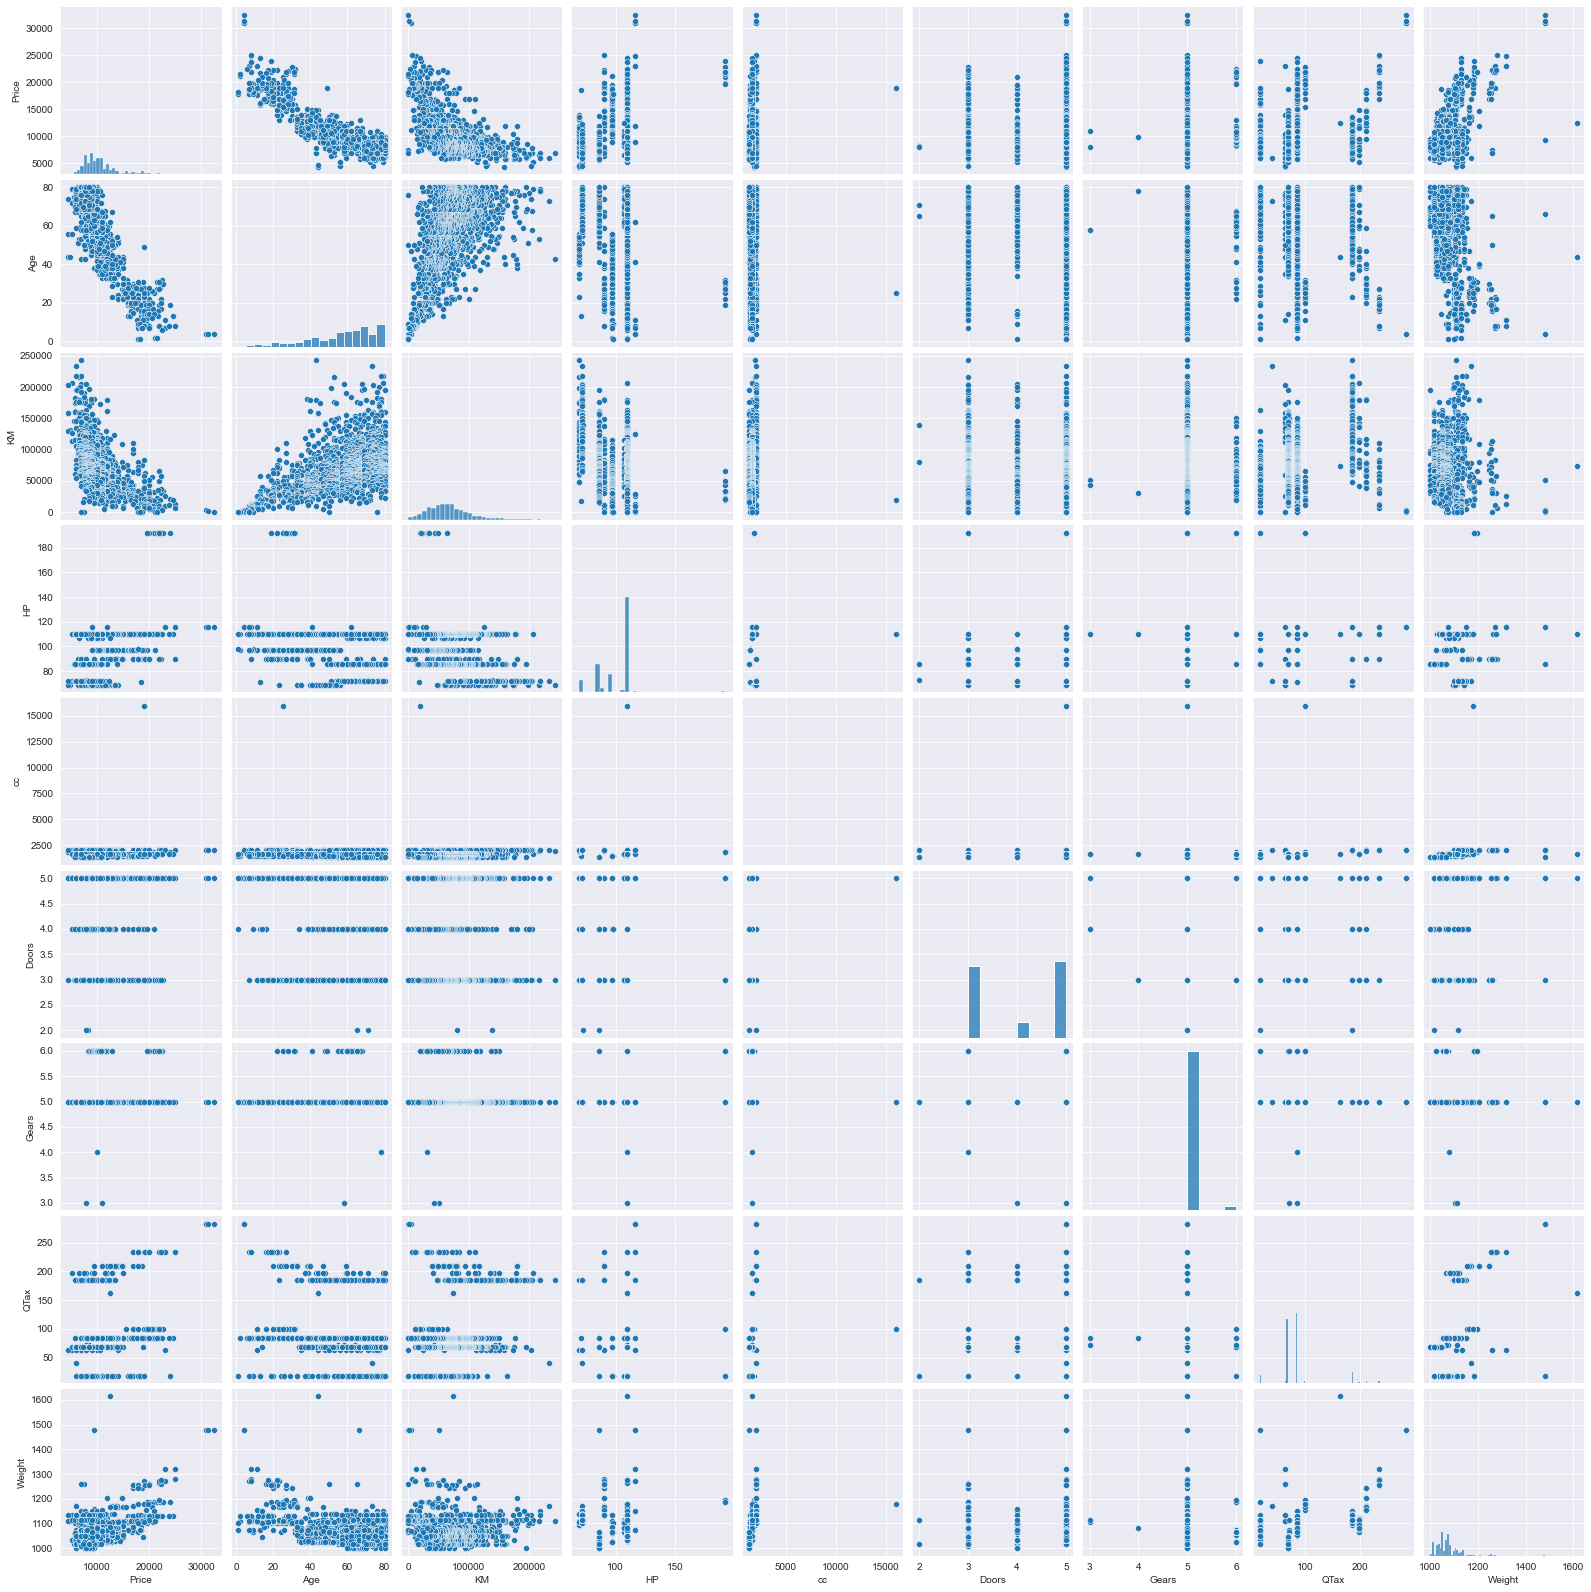

In [14]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota3)

# Try to fit a model for better price
# Model1
# Predict a model for better price with out using any transformation

In [15]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight', data = toyota3).fit()

In [16]:
#coeficients
model1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QTax            3.858805
Weight         16.855470
dtype: float64

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:02:23   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QTax           3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**From the above results we found that R-squared value is 0.863 , Adj.R-squared value is 0.862 and AIC value is 2.475e+04.**
**But here p-value of cc and Doors are greter than 0.05, hence it is insignificant.**

# Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)

C:\Users\Home\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


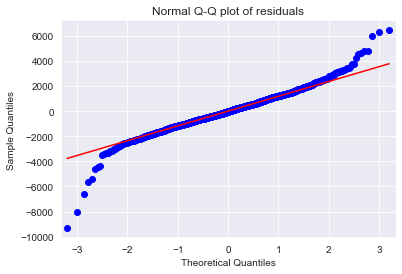

In [18]:
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model1.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)]

In [20]:
list(np.where(model1.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)]

### Residual Plot for Homoscedasticity

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

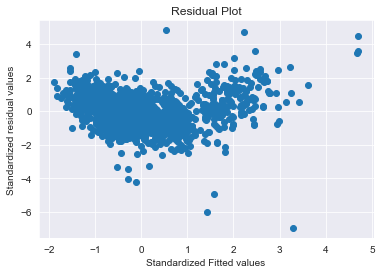

In [22]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

**This above plot shows that the residuals following homoscedastcity. We will remove the residual which are not following normality.**

In [23]:
toyota4= toyota3.drop(toyota3.index[[109,110,111,124,146,170,190,191,220,392,401,522,600,653,959,1057]],axis=0).reset_index()

In [24]:
toyota4= toyota4.drop(['index'],axis=1)

In [25]:
toyota4.shape

(1419, 9)

# Model2
## Lets improve a new model using new dataset toyota4

In [26]:
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight', data = toyota4).fit()

In [27]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1325.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:05:40   Log-Likelihood:                -12042.
No. Observations:                1419   AIC:                         2.410e+04
Df Residuals:                    1410   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.281e+04   1458.915     -8.779      0.000   -1.57e+04   -9946.344
Age         -114.9859      2.417    -47.568      0.000    -119.728    -110.244
KM            -0.0200      0.001    -17.773      0.000      -0.022      -0.018
HP            20.8295      2.586      8.054      0.000      15.756      25.903
cc            -0.1586      0.080     -1.981      0.048      -0.316      -0.002
Doors        -73.5254     36.164     -2.033      0.042    -144.467      -2.584
Gears        649.4229    172.976      3.754      0.000     310.105     988.741
QTax          -4.2058      1.298     -3.240      0.001      -6.752      -1.659
Weight        25.0748      1.268     19.773      0.000      22.587      27.562
==============================================================================
Omnibus:                        5.850   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.526
Skew:                           0.082   Prob(JB):                       0.0383
Kurtosis:                       3.289   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Detecting Influencers/Outliers
# Cook’s Distance

In [28]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

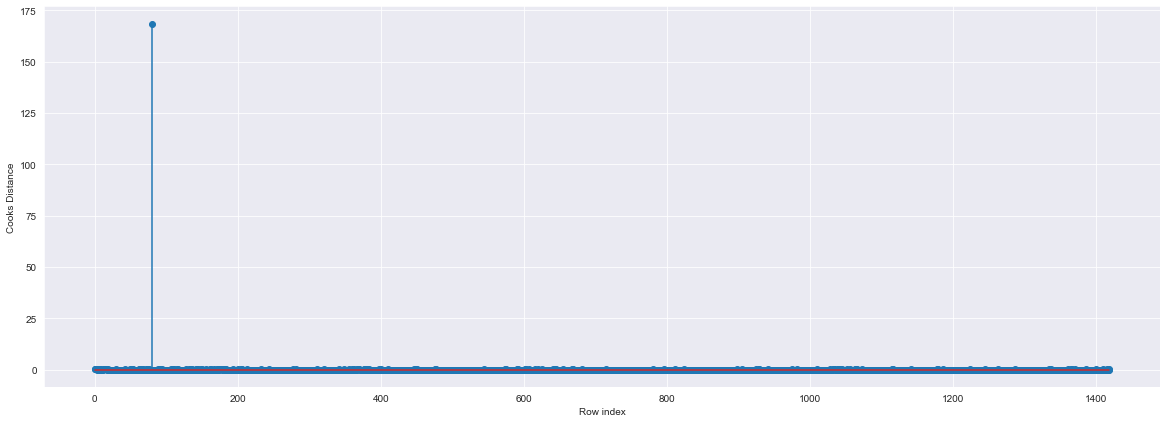

In [29]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
#index and value of outliers
(np.argmax(c),np.max(c))

(80, 168.48548782685228)

## We will do the laverage influence plot for detection of outlier in our dataset
# High influence point

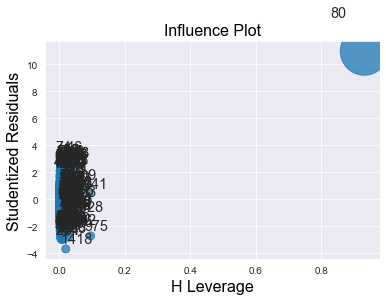

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [32]:
k = toyota4.shape[1]
n = toyota4.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.021141649048625793

#### From the above plot, it is evident that data point 80 is the influencers
## We will remove the 80 from our dataset

In [33]:
toyota5= toyota4.drop(toyota4.index[[80]],axis=0).reset_index()

In [34]:
toyota5= toyota5.drop(['index'],axis=1)

In [35]:
toyota5.shape

(1418, 9)

# Model3
### Improve model using new data toyota5

In [36]:
model3 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight', data = toyota5).fit()

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1445.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:09:51   Log-Likelihood:                -11977.
No. Observations:                1418   AIC:                         2.397e+04
Df Residuals:                    1409   BIC:                         2.402e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.622e+04   1435.062    -11.300      0.000    -1.9e+04   -1.34e+04
Age         -110.6898      2.354    -47.019      0.000    -115.308    -106.072
KM            -0.0169      0.001    -15.231      0.000      -0.019      -0.015
HP            29.9245      2.619     11.428      0.000      24.788      35.061
cc            -3.2624      0.294    -11.115      0.000      -3.838      -2.687
Doors       -134.9626     35.177     -3.837      0.000    -203.968     -65.957
Gears        531.3663    166.454      3.192      0.001     204.842     857.891
QTax           1.3796      1.347      1.024      0.306      -1.262       4.021
Weight        31.8442      1.366     23.320      0.000      29.166      34.523
==============================================================================
Omnibus:                        8.891   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.119
Skew:                           0.119   Prob(JB):                      0.00635
Kurtosis:                       3.338   Cond. No.                     3.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**From the above results we found that R-squared value is 0.891 , Adj.R-squared value is 0.891 and AIC value is 2.397e+04.**
**But here p-value of QTax greater than 0.05, hence it is insignificant.**

# Cook's Distance

In [38]:
model3_influence = model3.get_influence()
(c, _) = model3_influence.cooks_distance

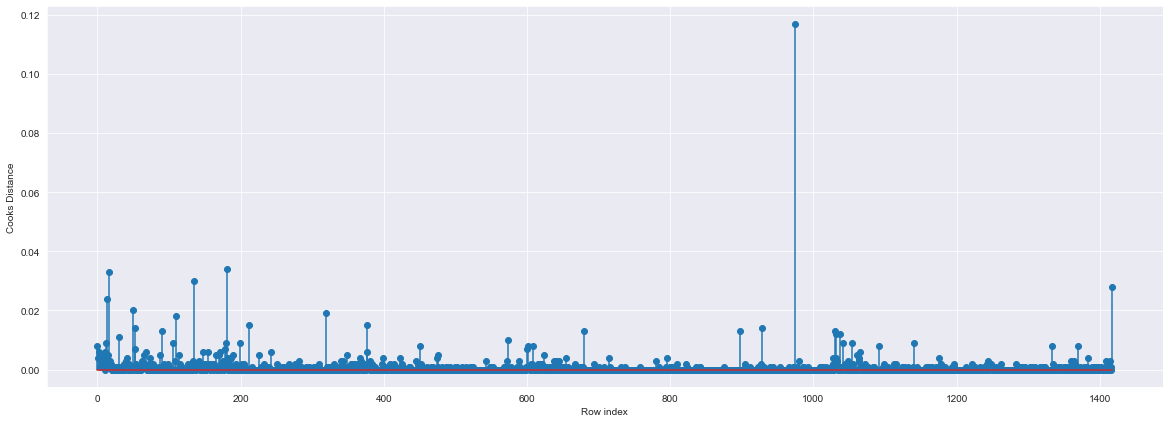

In [39]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
#index and value of outliers
(np.argmax(c),np.max(c))

(974, 0.11665661388520969)

#### From the above plot, it is evident that data point 974 is the influencers
## We will remove the 974 from our dataset

In [41]:
toyota6= toyota5.drop(toyota4.index[[974]],axis=0).reset_index()
toyota6= toyota6.drop(['index'],axis=1)

# Model4
### Improve model using new data toyota6

In [42]:
model4 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight', data = toyota6).fit()

In [58]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1455.
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:06:04   Log-Likelihood:                -11964.
No. Observations:                1417   AIC:                         2.395e+04
Df Residuals:                    1408   BIC:                         2.399e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.569e+04   1440.268    -10.892      0.000   -1.85e+04   -1.29e+04
Age         -110.3879      2.349    -47.001      0.000    -114.995    -105.781
KM            -0.0169      0.001    -15.269      0.000      -0.019      -0.015
HP            30.4886      2.616     11.653      0.000      25.356      35.621
cc            -3.2922      0.293    -11.246      0.000      -3.866      -2.718
Doors       -144.2598     35.189     -4.100      0.000    -213.288     -75.231
Gears        364.8142    174.098      2.095      0.036      23.295     706.333
QTax           1.3355      1.343      0.995      0.320      -1.298       3.969
Weight        32.1468      1.365     23.559      0.000      29.470      34.824
==============================================================================
Omnibus:                        9.350   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.478
Skew:                           0.131   Prob(JB):                      0.00531
Kurtosis:                       3.330   Cond. No.                     3.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predict the model for Price

In [59]:
pred = model4.predict(toyota6.iloc[:,1:])

In [60]:
pred

0       16261.072271
1       15821.622564
2       16240.010268
3       15912.737575
4       15792.791203
            ...     
1412     9124.687591
1413     8498.201593
1414     8642.186235
1415     8754.267550
1416    10949.691989
Length: 1417, dtype: float64

In [61]:
actual = toyota6.Price

In [62]:
from ml_metrics import rmse
rmse(pred,actual)

1123.2127870799336

# Conclusion - Comparing between all models , model4 has higher R-squared value i.e. 0.892 and lower AIC value i.e. 2.395e+04 as comapare to others.
# Hence model4 is better to predict the Price.